<a href="https://colab.research.google.com/github/PalakAggarwal13/PyTorch-DeepLearning/blob/main/PyTorch_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print(torch.__version__)

2.6.0+cu124


In [2]:
t1 = torch.tensor(4.)
t1

tensor(4.)

In [3]:
t1.dtype

torch.float32

In [4]:
t2 = torch.tensor([1.,2,3,4])
t2

tensor([1., 2., 3., 4.])

In [5]:
t2.dtype

torch.float32

In [6]:
t3 = torch.tensor([[1.,2,3],[4,5,6],[7,8,9]])
t3

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [7]:
t3.dtype

torch.float32

In [8]:
t4 = torch.tensor([
    [[11.,12,13],
     [14,15,16]],
    [[17,18,19],
     [20,21,22]]
])
t4

tensor([[[11., 12., 13.],
         [14., 15., 16.]],

        [[17., 18., 19.],
         [20., 21., 22.]]])

In [9]:
t4.dtype

torch.float32

In [10]:
t1.shape

torch.Size([])

In [11]:
t2.shape

torch.Size([4])

In [12]:
t3.shape

torch.Size([3, 3])

In [13]:
t4.shape

torch.Size([2, 2, 3])

In [14]:
x = torch.tensor(3.)
w = torch.tensor(4. , requires_grad = True)
b = torch.tensor(5. , requires_grad = True)

In [15]:
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

In [16]:
y.backward()

In [17]:
print("dy/dx:" , x.grad)
print("dy/dw:" , w.grad)
print("dy/db:" , b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


In [18]:
import numpy as np

x = np.array([[1.,2,3],[4,5,6]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [19]:
y = torch.from_numpy(x)            #or you can do torch.tensor(x)
y

tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)

In [20]:
x.dtype , y.dtype

(dtype('float64'), torch.float64)

In [21]:
z = y.numpy()
z

array([[1., 2., 3.],
       [4., 5., 6.]])

In [22]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

In [23]:
# Targets (apples, oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

In [24]:
inputs = torch.tensor(inputs)
targets = torch.tensor(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [25]:
w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)
print(w)
print(b)

tensor([[-2.3157,  0.3720,  1.8833],
        [-0.5566,  0.9375, -1.2710]], requires_grad=True)
tensor([-0.1533, -0.2004], requires_grad=True)


In [26]:
def model(x):
  return x @ w.t() + b

In [27]:
preds = model(inputs)
preds

tensor([[ -63.2961,  -32.6758],
        [ -57.6178,  -49.6988],
        [ -42.5434,    3.2777],
        [-150.6801,  -63.6918],
        [   7.6042,  -37.5789]], grad_fn=<AddBackward0>)

In [28]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [29]:
def mse(t1,t2):
  diff = t1-t2
  return torch.sum(diff * diff) / diff.numel()

In [30]:
loss = mse(preds , targets)
print(loss)  # full tensor

tensor(18319.7617, grad_fn=<DivBackward0>)


In [31]:
loss.backward()

In [32]:
print("dl/dw : " , w.grad)
print("dl/db : " , b.grad)

dl/dw :  tensor([[-11914.5576, -11684.2529,  -7287.5312],
        [-10713.8555, -11376.9785,  -7253.9600]])
dl/db :  tensor([-137.5066, -128.0735])


In [33]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


# **GRADIENT DESCENT**

In [34]:
import torch

inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

inputs = torch.tensor(inputs)
targets = torch.tensor(targets)

w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)

lr = 1e-5

def mse(preds,targets):
  return torch.mean((preds-targets)**2)

for epoch in range(100):

  preds = inputs @ w.t() + b
  loss  = mse(preds,targets)

  loss.backward()

  with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad

    w.grad.zero_()
    b.grad.zero_()

  if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f} ,  w =\n{w} , b = {b}")

Epoch 0: Loss = 9835.3018 ,  w =
tensor([[-0.5230, -0.4067,  1.4474],
        [-1.5611,  0.9949,  1.1242]], requires_grad=True) , b = tensor([-1.0581, -1.3843], requires_grad=True)
Epoch 10: Loss = 715.5101 ,  w =
tensor([[-0.2262, -0.0269,  1.6563],
        [-1.2043,  1.2793,  1.3177]], requires_grad=True) , b = tensor([-1.0545, -1.3804], requires_grad=True)
Epoch 20: Loss = 483.5219 ,  w =
tensor([[-0.2075,  0.0505,  1.6795],
        [-1.1132,  1.2844,  1.3376]], requires_grad=True) , b = tensor([-1.0542, -1.3795], requires_grad=True)
Epoch 30: Loss = 429.7278 ,  w =
tensor([[-0.2260,  0.0845,  1.6768],
        [-1.0615,  1.2530,  1.3337]], requires_grad=True) , b = tensor([-1.0544, -1.3792], requires_grad=True)
Epoch 40: Loss = 385.1366 ,  w =
tensor([[-0.2483,  0.1113,  1.6705],
        [-1.0177,  1.2184,  1.3267]], requires_grad=True) , b = tensor([-1.0546, -1.3789], requires_grad=True)
Epoch 50: Loss = 345.7991 ,  w =
tensor([[-0.2697,  0.1358,  1.6635],
        [-0.9772,  1.1854

# **Linear regression using PyTorch built-ins**

In [35]:
import torch.nn as nn

In [36]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58],
                   [102, 43, 37], [69, 96, 70], [73, 67, 43],
                   [91, 88, 64], [87, 134, 58], [102, 43, 37],
                   [69, 96, 70], [73, 67, 43], [91, 88, 64],
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]],
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133],
                    [22, 37], [103, 119], [56, 70],
                    [81, 101], [119, 133], [22, 37],
                    [103, 119], [56, 70], [81, 101],
                    [119, 133], [22, 37], [103, 119]],
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [37]:
from torch.utils.data import TensorDataset

In [38]:
train_ds = TensorDataset(inputs,targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [39]:
from torch.utils.data import DataLoader

In [40]:
batch_size=5
train_dl = DataLoader(train_ds,batch_size,shuffle=True)

In [41]:
i=0
for xb,yb in train_dl:
  print(f"batch:{i} ")
  print(xb)
  print(yb)
  i +=1

batch:0 
tensor([[ 91.,  88.,  64.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.]])
tensor([[ 81., 101.],
        [ 22.,  37.],
        [103., 119.],
        [103., 119.],
        [ 56.,  70.]])
batch:1 
tensor([[102.,  43.,  37.],
        [ 87., 134.,  58.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [ 87., 134.,  58.]])
tensor([[ 22.,  37.],
        [119., 133.],
        [ 81., 101.],
        [119., 133.],
        [119., 133.]])
batch:2 
tensor([[102.,  43.,  37.],
        [ 91.,  88.,  64.],
        [ 73.,  67.,  43.],
        [ 73.,  67.,  43.],
        [ 69.,  96.,  70.]])
tensor([[ 22.,  37.],
        [ 81., 101.],
        [ 56.,  70.],
        [ 56.,  70.],
        [103., 119.]])


In [42]:
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.0510, -0.1330, -0.0955],
        [-0.4604, -0.4728, -0.5386]], requires_grad=True)
Parameter containing:
tensor([ 0.3812, -0.3338], requires_grad=True)


In [43]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0510, -0.1330, -0.0955],
         [-0.4604, -0.4728, -0.5386]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3812, -0.3338], requires_grad=True)]

In [44]:
import torch.nn.functional as F

In [45]:
loss_fn = F.mse_loss

In [46]:
loss = loss_fn(model(inputs),targets)
print(loss)

tensor(26212.5312, grad_fn=<MseLossBackward0>)


In [47]:
opt = torch.optim.SGD(model.parameters(),lr=1e-5)

In [48]:
def fit(num_epochs,model,loss_fn,opt):
  for epoch in range(num_epochs):
    for xb,yb in train_dl:
      preds = model(xb)
      loss = loss_fn(preds,yb)
      loss.backward()
      opt.step()
      opt.zero_grad()

    if (epoch+1) % 10 == 0:
          print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [49]:
fit(100, model, loss_fn, opt)

Epoch [10/100], Loss: 721.7936
Epoch [20/100], Loss: 239.1852
Epoch [30/100], Loss: 211.0230
Epoch [40/100], Loss: 115.4425
Epoch [50/100], Loss: 158.9163
Epoch [60/100], Loss: 81.5605
Epoch [70/100], Loss: 69.3169
Epoch [80/100], Loss: 53.2761
Epoch [90/100], Loss: 41.9194
Epoch [100/100], Loss: 48.0343


In [50]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 58.6796,  71.6782],
        [ 80.6999,  97.1156],
        [119.5133, 138.6631],
        [ 29.3957,  44.9792],
        [ 94.5347, 108.2552],
        [ 58.6796,  71.6782],
        [ 80.6999,  97.1156],
        [119.5133, 138.6631],
        [ 29.3957,  44.9792],
        [ 94.5347, 108.2552],
        [ 58.6796,  71.6782],
        [ 80.6999,  97.1156],
        [119.5133, 138.6631],
        [ 29.3957,  44.9792],
        [ 94.5347, 108.2552]], grad_fn=<AddmmBackward0>)

In [51]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

# **Working with Images & Logistic Regression in PyTorch**

In [52]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [53]:
dataset = MNIST(root='data/',download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 38.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.08MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.69MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.39MB/s]


In [54]:
len(dataset)

60000

In [55]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [56]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


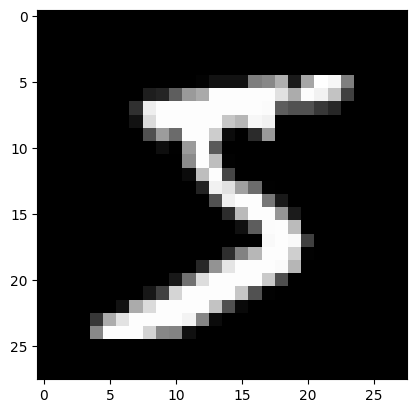

In [58]:
image , label = dataset[0]
plt.imshow(image , cmap='gray')
print("Label:" ,label)

Label: 3


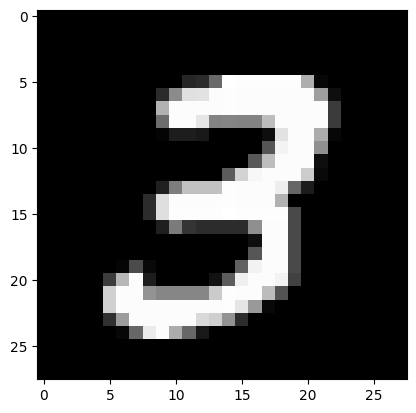

In [59]:
image , label = dataset[7]
plt.imshow(image , cmap='gray')
print("Label:" , label)

In [60]:
import torchvision.transforms as transforms

In [61]:
dataset = MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [62]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [63]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


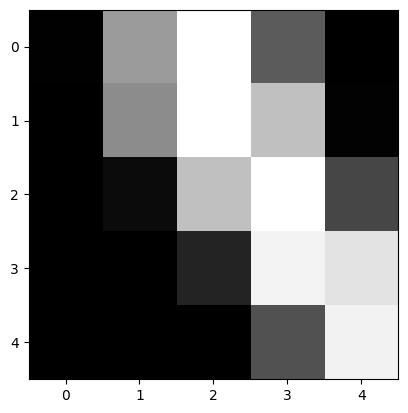

In [64]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray');

In [65]:
from torch.utils.data import random_split

train_ds , val_ds = random_split(dataset,[50000,10000])
len(train_ds) , len(val_ds)

(50000, 10000)

In [66]:
from torch.utils.data import DataLoader

batch_size=128

train_loader = DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds,batch_size)

In [67]:
import numpy as np

def split_indices(n,val_pct):
  n_val = int(val_pct*n)
  idxs = np.random.permutation(n)
  return idxs[n_val:] , idxs[:n_val]

In [68]:
train_indices , val_indices = split_indices(len(dataset),val_pct=0.2)

In [69]:
print(len(train_indices)) , print(len(val_indices))
print("sample val_indices : ", val_indices[:20])

48000
12000
sample val_indices :  [12320 38469 39362 52901 52185 54438   166 24390 37840 30285 31265 47162
 53873 25357 24129  6285 18557 17302 18921 57958]


In [70]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [71]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,
                          batch_size,
                          sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                        batch_size,
                        sampler = val_indices)

In [72]:
print("xb.shape before flattening:", xb.shape)

xb.shape before flattening: torch.Size([5, 3])


In [73]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size,num_classes)

In [74]:
print(model.weight.shape)
print(model.weight)

torch.Size([10, 784])
Parameter containing:
tensor([[ 0.0283,  0.0208,  0.0171,  ...,  0.0013, -0.0034,  0.0129],
        [ 0.0328,  0.0336, -0.0324,  ...,  0.0024,  0.0272, -0.0300],
        [-0.0266, -0.0168, -0.0319,  ...,  0.0275,  0.0142, -0.0339],
        ...,
        [-0.0278,  0.0205,  0.0349,  ..., -0.0130, -0.0327,  0.0314],
        [ 0.0030, -0.0021,  0.0107,  ..., -0.0021,  0.0334, -0.0035],
        [-0.0145,  0.0156, -0.0165,  ..., -0.0318,  0.0157,  0.0328]],
       requires_grad=True)


In [75]:
print(model.bias.shape)
print(model.bias)

torch.Size([10])
Parameter containing:
tensor([ 0.0321,  0.0267, -0.0122, -0.0030,  0.0025,  0.0310,  0.0124, -0.0229,
         0.0075, -0.0169], requires_grad=True)


In [76]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(28*28, 10)

    def forward(self, xb):
        xb = xb.view(xb.size(0), -1)
        return self.linear(xb)

model = MnistModel()

In [77]:
print(model.linear.weight.shape)
print(model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784])
torch.Size([10])


[Parameter containing:
 tensor([[ 0.0034,  0.0334, -0.0168,  ...,  0.0210, -0.0134, -0.0296],
         [-0.0058,  0.0009, -0.0334,  ...,  0.0224,  0.0315,  0.0039],
         [-0.0334, -0.0274,  0.0336,  ...,  0.0125,  0.0249, -0.0161],
         ...,
         [ 0.0245,  0.0350,  0.0096,  ...,  0.0348,  0.0341,  0.0259],
         [ 0.0167,  0.0242,  0.0250,  ..., -0.0157,  0.0172, -0.0302],
         [ 0.0354, -0.0256,  0.0039,  ...,  0.0002,  0.0341, -0.0336]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0352, -0.0006, -0.0340, -0.0291, -0.0029, -0.0162,  0.0247, -0.0257,
         -0.0290, -0.0352], requires_grad=True)]

In [78]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([100, 10])
Sample outputs :
 tensor([[ 0.0695,  0.2146, -0.1525,  0.0348,  0.3299, -0.3137,  0.0689,  0.1021,
         -0.3060,  0.1818],
        [ 0.0795, -0.1733, -0.0526, -0.0652,  0.2032, -0.0608,  0.2033,  0.0166,
         -0.1816,  0.0394]])


In [79]:
probs = F.softmax(outputs,dim=1)
print(probs[:2].data)
print("Sum : " , torch.sum(probs[0]).item())

tensor([[0.1027, 0.1187, 0.0822, 0.0992, 0.1332, 0.0700, 0.1026, 0.1061, 0.0705,
         0.1149],
        [0.1073, 0.0833, 0.0940, 0.0928, 0.1214, 0.0932, 0.1214, 0.1008, 0.0826,
         0.1031]])
Sum :  0.9999999403953552


In [80]:
max_probs , preds = torch.max(probs , dim=1)
print(preds)
print(max_probs)

tensor([4, 6, 6, 9, 4, 9, 1, 4, 4, 4, 1, 1, 4, 7, 4, 6, 1, 7, 9, 4, 4, 1, 7, 4,
        1, 1, 0, 6, 0, 4, 4, 9, 7, 0, 4, 6, 4, 0, 4, 4, 9, 4, 1, 0, 6, 0, 4, 0,
        4, 4, 1, 9, 4, 9, 6, 4, 4, 1, 4, 4, 9, 4, 9, 4, 6, 6, 9, 6, 9, 9, 4, 4,
        4, 9, 4, 4, 4, 4, 4, 9, 4, 7, 1, 4, 4, 0, 4, 7, 1, 4, 1, 9, 0, 9, 6, 4,
        0, 4, 0, 4])
tensor([0.1332, 0.1214, 0.1218, 0.1303, 0.1364, 0.1513, 0.1265, 0.1427, 0.1678,
        0.1652, 0.1401, 0.1320, 0.1316, 0.1239, 0.1317, 0.1278, 0.1396, 0.1310,
        0.1301, 0.1342, 0.1500, 0.1287, 0.1393, 0.1168, 0.1248, 0.1355, 0.1196,
        0.1154, 0.1246, 0.1141, 0.1237, 0.1505, 0.1473, 0.1358, 0.1207, 0.1429,
        0.1310, 0.1312, 0.1441, 0.1195, 0.1455, 0.1466, 0.1345, 0.1238, 0.1172,
        0.1236, 0.1654, 0.1610, 0.1222, 0.1434, 0.1211, 0.1682, 0.1266, 0.1260,
        0.1229, 0.1377, 0.1496, 0.1331, 0.1284, 0.1209, 0.1324, 0.1457, 0.1449,
        0.1401, 0.1256, 0.1174, 0.1610, 0.1484, 0.1643, 0.1144, 0.1305, 0.1401,
        0.1380, 0.1

In [81]:
labels

tensor([3, 3, 3, 1, 7, 2, 5, 8, 7, 7, 3, 6, 7, 9, 0, 2, 0, 7, 1, 5, 5, 6, 4, 3,
        4, 5, 1, 1, 9, 5, 5, 2, 7, 9, 4, 1, 8, 8, 5, 6, 3, 8, 0, 3, 1, 6, 9, 7,
        3, 9, 9, 3, 9, 6, 6, 8, 5, 6, 7, 5, 1, 3, 6, 8, 1, 5, 2, 6, 2, 5, 7, 7,
        3, 3, 3, 5, 5, 3, 0, 2, 8, 4, 9, 2, 8, 7, 2, 4, 5, 5, 0, 9, 8, 6, 1, 8,
        5, 3, 6, 0])

In [82]:
def accuracy(outputs , labels):
  max_probs , preds = torch.max(probs,dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [83]:
accuracy(preds,labels)

tensor(0.0600)

In [84]:
loss_fn = F.cross_entropy

loss = loss_fn(outputs,preds)
print(loss)

tensor(1.9974, grad_fn=<NllLossBackward0>)


In [85]:
lr = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr)

In [86]:
def loss_batch(model , loss_fn , xb , yb , opt=None , metric = None):
  preds = model(xb)
  loss = loss_fn(preds,yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_results = None
  if metric is not None:
    metric_results = metric(preds,yb)

  return loss.item(),len(xb),metric_results

In [87]:
def evaluate(model , loss_fn , valid_dl , metric = None):
  with torch.no_grad():
    results = [loss_batch(model , loss_fn , xb , yb , metric = metric)for xb, yb in valid_dl]
    losses , nums , metrics = zip(*results)
    total = np.sum(nums)
    avg_loss = np.sum(np.multiply(nums,losses)) / total
    avg_metric = None
    if metric is not None:
      avg_metric = np.sum(np.multiply(nums,metrics)) / total
    return avg_loss , total , avg_metric

In [88]:
def accuracy(outputs , labels):
  _,preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds==labels).item() / len(preds))

In [89]:
val_loss , total , val_accuracy = evaluate(model , loss_fn , val_loader , metric = accuracy)
print('Loss:{:.4f},Accuracy:{:.4f}'.format(val_loss,val_accuracy))

Loss:2.3265,Accuracy:0.0860


In [90]:
def fit(epochs , model , loss_fn , opt , train_dl , val_dl , metric=None):
  for epoch in range(epochs):
    for xb , yb in train_dl:
      loss = loss_batch(model,loss_fn,xb,yb,opt)
      result = evaluate(model , loss_fn , val_dl , metric)
      val_loss , total , val_metrics = result

      if metric is None:
        print('Epoch [{}/{}] , loss = {:.4f}'.format(epoch+1 , epochs , val_loss))
      else:
        print('Epoch [{}/{}] , loss = {:.4f} , {} : {:.4f}'.format(epoch+1 , epochs , val_loss , metric.__name__,val_metrics))

In [91]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters() , lr=0.001)

In [92]:
# fit(5 , model , F.cross_entropy ,optimizer,train_loader,val_loader,accuracy)

In [93]:
test_dataset= MNIST(root='data/',train=False,transform = transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


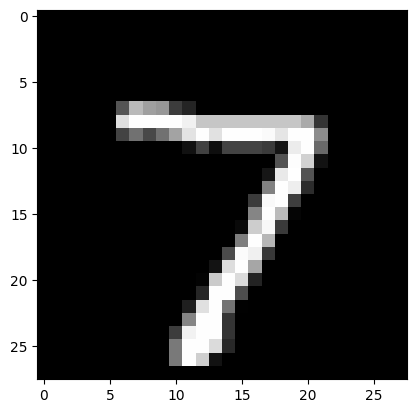

In [94]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [95]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 4


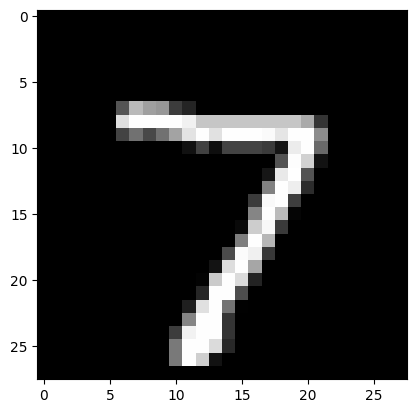

In [96]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


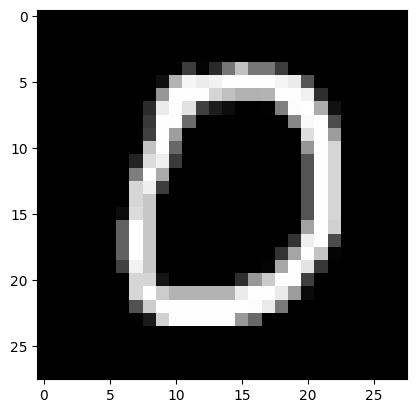

In [97]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 0


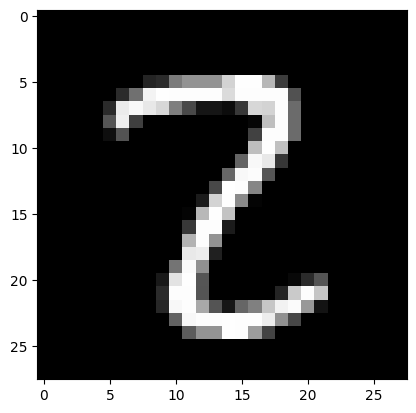

In [98]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [99]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model,F.cross_entropy, test_loader,metric=accuracy)
result

(np.float64(2.3031083282470703), np.int64(10000), np.float64(0.1153))

In [100]:
torch.save(model.state_dict(), 'mnist-logistic.pth')
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 2.5226e-02,  1.6332e-02,  1.6088e-02,  ...,  6.9904e-04,
                       -1.0335e-02, -1.5126e-02],
                      [ 2.6900e-02, -7.0355e-04, -2.5373e-02,  ...,  9.1165e-03,
                        2.8067e-02,  2.7284e-02],
                      [ 2.3779e-02, -3.5124e-02,  1.2713e-02,  ...,  2.5038e-02,
                       -1.6301e-02, -2.4555e-02],
                      ...,
                      [ 1.1285e-02, -2.1506e-02,  1.0971e-02,  ..., -3.5549e-02,
                       -2.7505e-02, -3.2004e-02],
                      [-3.6908e-03, -2.2928e-02, -1.5778e-02,  ..., -1.7986e-02,
                        2.2010e-03,  5.7420e-03],
                      [-1.7158e-02, -4.7782e-03, -1.3649e-05,  ...,  2.8023e-02,
                        2.1644e-02, -3.0034e-02]])),
             ('linear.bias',
              tensor([-0.0036, -0.0221, -0.0073, -0.0212, -0.0257,  0.0047, -0.0330, -0.0105,
                      -0.0094,

In [101]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 2.5226e-02,  1.6332e-02,  1.6088e-02,  ...,  6.9904e-04,
                       -1.0335e-02, -1.5126e-02],
                      [ 2.6900e-02, -7.0355e-04, -2.5373e-02,  ...,  9.1165e-03,
                        2.8067e-02,  2.7284e-02],
                      [ 2.3779e-02, -3.5124e-02,  1.2713e-02,  ...,  2.5038e-02,
                       -1.6301e-02, -2.4555e-02],
                      ...,
                      [ 1.1285e-02, -2.1506e-02,  1.0971e-02,  ..., -3.5549e-02,
                       -2.7505e-02, -3.2004e-02],
                      [-3.6908e-03, -2.2928e-02, -1.5778e-02,  ..., -1.7986e-02,
                        2.2010e-03,  5.7420e-03],
                      [-1.7158e-02, -4.7782e-03, -1.3649e-05,  ...,  2.8023e-02,
                        2.1644e-02, -3.0034e-02]])),
             ('linear.bias',
              tensor([-0.0036, -0.0221, -0.0073, -0.0212, -0.0257,  0.0047, -0.0330, -0.0105,
                      -0.0094,

In [102]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, F.cross_entropy,test_loader, metric=accuracy)
result

(np.float64(2.3031083282470703), np.int64(10000), np.float64(0.1153))

# **TRAINING DEEP NEURAL NETWORK USING GPU**

In [103]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader

In [104]:
dataset = MNIST(root='data/' , download=True,transform = transforms.ToTensor())

In [105]:
len(dataset)

60000

torch.Size([1, 28, 28])
5


(None, None)

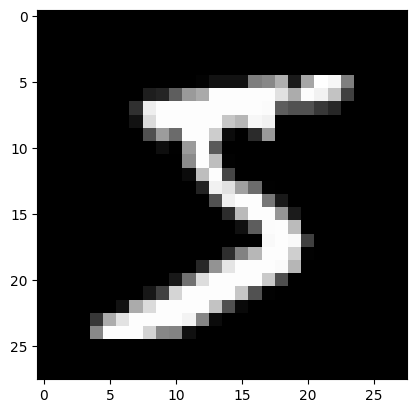

In [106]:
img , label = dataset[0]
plt.imshow(img[0] , cmap='gray')
print(img.shape) , print(label)

In [107]:
def split_indices(n,val_pct):
  n_val = int(n*val_pct)
  idxs = np.random.permutation(n)
  return idxs[n_val:] , idxs[:n_val]

In [108]:
train_indices , val_indices = split_indices(len(dataset),val_pct=0.2)
print(len(train_indices)) , print(len(val_indices))

48000
12000


(None, None)

In [109]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset , batch_size=batch_size , sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset , batch_size=batch_size , sampler = val_sampler)

In [110]:
for images, labels in train_loader:
    print(images.shape)  # torch.Size([100, 1, 28, 28])
    images_flat = images.view(images.size(0), -1)
    print(images_flat.shape)  # torch.Size([100, 784])
    break

torch.Size([100, 1, 28, 28])
torch.Size([100, 784])


In [111]:
import torch.nn as nn
import torch.nn.functional as F

In [112]:
class MnistModel(nn.Module):
    def __init__(self,in_size,hidden_size,out_size):
      super().__init__()
      self.linear1 = nn.Linear(in_size,hidden_size)
      self.linear2 = nn.Linear(hidden_size,out_size)

    def forward(self,xb):
      xb = xb.view(xb.size(0),-1)
      out = self.linear1(xb)
      out = F.relu(out)
      out = self.linear2(out)
      return out

In [113]:
input_size = 28*28
num_classes = 10

model = MnistModel(in_size=input_size,hidden_size=32,out_size=10)

In [114]:
for t in model.parameters():
  print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [115]:
for images , labels in train_loader:
  outputs = model(images)
  loss = F.cross_entropy(outputs,labels)
  print('Loss:',loss.item())
  break

print(outputs.shape)
print(outputs[:2])

Loss: 2.277771472930908
torch.Size([100, 10])
tensor([[-0.1099,  0.1942,  0.1530,  0.1530,  0.0572, -0.0497,  0.0832, -0.0164,
          0.1098,  0.0374],
        [-0.1555,  0.1601,  0.1215,  0.1519,  0.0106, -0.0244,  0.0503, -0.0256,
          0.0687,  0.0514]], grad_fn=<SliceBackward0>)


In [116]:
torch.cuda.is_available()

False

In [117]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

In [118]:
device = get_default_device()
device

device(type='cpu')

In [119]:
def to_device(data,device):
  if isinstance(data,(list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device,non_blocking=True)

In [120]:
for images , labels in train_loader:
  print(images.shape)
  images = to_device(images,device)
  print(images.device)
  break

torch.Size([100, 1, 28, 28])
cpu


In [121]:
class DeviceDataLoader():
  def __init__(self,dl,device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    for b in self.dl:
      yield to_device(b,self.device)

  def __len__(self):
    return len(self.dl)

In [122]:
train_dl = DeviceDataLoader(train_loader,device)
val_dl = DeviceDataLoader(val_loader,device)

In [123]:
for xb , yb in train_dl:
  print(xb.device)
  print(yb)
  break

cpu
tensor([5, 0, 8, 9, 8, 3, 0, 5, 3, 7, 2, 2, 1, 9, 4, 7, 2, 8, 4, 8, 8, 4, 1, 6,
        7, 1, 6, 2, 3, 3, 1, 2, 4, 2, 0, 6, 6, 0, 1, 8, 4, 9, 9, 1, 6, 2, 9, 8,
        1, 8, 6, 0, 5, 3, 9, 3, 1, 9, 1, 1, 2, 5, 9, 2, 1, 2, 8, 1, 3, 7, 2, 8,
        5, 5, 6, 1, 4, 5, 8, 1, 6, 4, 8, 1, 6, 5, 6, 0, 8, 4, 8, 2, 7, 6, 4, 3,
        4, 8, 8, 3])


In [124]:
def loss_batch(model , loss_fn , xb , yb , opt=None , metric=None):
  preds = model(xb)
  loss = loss_fn(preds,yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_results = None
  if metric is not None:
    metric_results = metric(preds,yb)

  return loss.item() , len(xb) , metric_results

In [125]:
def evaluate(model , loss_fn , val_dl , metric=None):
  with torch.no_grad():
    results = [loss_batch(model , loss_fn , xb , yb , metric = metric) for xb , yb in val_dl]
    losses , nums , metrics = zip(*results)
    total = np.sum(nums)
    avg_loss = np.sum(np.multiply(nums,losses)) / total
    avg_metric = None
    if metric is not None:
      avg_metric = np.sum(np.multiply(nums,metrics)) / total
    return avg_loss , total , avg_metric

In [126]:
def fit(epochs , lr , model , loss_fn , train_dl , val_dl , opt = None , metric=None):
  losses , metrics = [] , []
  if opt is None:
    opt = torch.optim.SGD(model.parameters() , lr=lr)

  for epoch in range(epochs):
    for xb , yb in train_dl:
      loss,_,_ = loss_batch(model , loss_fn , xb , yb , opt)

    result = evaluate(model , loss_fn , val_dl , metric)
    val_loss , total , val_metrics = result
    losses.append(loss)
    metrics.append(val_metrics)

    if metric is None:
      print('Epoch [{}/{}] , loss = {:.4f}'.format(epoch+1 , epochs , val_loss))
    else:
      print('Epoch [{}/{}] , loss = {:.4f} , {} : {:.4f}'.format(epoch+1 , epochs , val_loss , metric.__name__,val_metrics))

  return losses , metrics

In [127]:
def accuracy(outputs , labels):
  _,preds = torch.max(outputs,dim=1)
  return torch.sum(preds == labels).item() / len(preds)

In [128]:
model = MnistModel(input_size , hidden_size = 32 , out_size = num_classes)
to_device(model , device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [129]:
val_loss , total , val_accuracy = evaluate(model , F.cross_entropy , val_dl , metric = accuracy)
print('Loss: {:.4f} , Accuracy : {:.4f}'.format(val_loss , val_accuracy))

Loss: 2.2922 , Accuracy : 0.1347


In [130]:
losses1 , metrics1 = fit(5 , 0.5 , model , F.cross_entropy , train_dl , val_dl , metric = accuracy )

Epoch [1/5] , loss = 0.2074 , accuracy : 0.9373
Epoch [2/5] , loss = 0.1831 , accuracy : 0.9433
Epoch [3/5] , loss = 0.1579 , accuracy : 0.9512
Epoch [4/5] , loss = 0.1377 , accuracy : 0.9579
Epoch [5/5] , loss = 0.1317 , accuracy : 0.9614


In [131]:
losses2 , metrics2 = fit(10 , 0.1 , model , F.cross_entropy , train_dl , val_dl , metric = accuracy )

Epoch [1/10] , loss = 0.1163 , accuracy : 0.9633
Epoch [2/10] , loss = 0.1139 , accuracy : 0.9643
Epoch [3/10] , loss = 0.1134 , accuracy : 0.9637
Epoch [4/10] , loss = 0.1119 , accuracy : 0.9653
Epoch [5/10] , loss = 0.1121 , accuracy : 0.9654
Epoch [6/10] , loss = 0.1123 , accuracy : 0.9646
Epoch [7/10] , loss = 0.1109 , accuracy : 0.9652
Epoch [8/10] , loss = 0.1135 , accuracy : 0.9645
Epoch [9/10] , loss = 0.1101 , accuracy : 0.9651
Epoch [10/10] , loss = 0.1104 , accuracy : 0.9654


Text(0.5, 1.0, 'Accuracy vs No. of epochs')

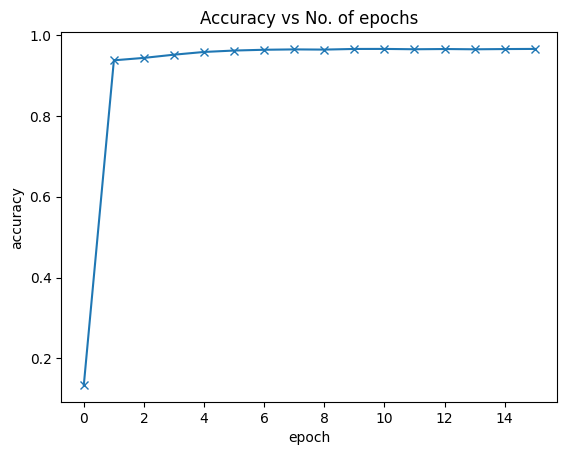

In [132]:
accuracies = [val_accuracy] + metrics1 + metrics2
plt.plot(accuracies , '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No. of epochs')

# **IMAGE CLASSIFICATION USING CONVOLUTION NEURAL NETWORKS (CNNs)**

In [133]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10

In [134]:
# dataset_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
# download_url(dataset_url, '.')
# with tarfile.open('./cifar-10-python.tar.gz' , 'r:gz') as tar:
#   tar.extractall(path='./data')

In [135]:
# data_dir = './data/cifar-10-batches-py'

# print(os.listdir(data_dir))
# classes = os.listdir(data_dir + "/train")
# print(classes)

In [136]:
simple_model = nn.Sequential(
    nn.Conv2d(1,8,kernel_size=3,stride=1,padding=1),
    nn.MaxPool2d(2,2)
)

In [137]:
for images , labels in train_dl:
  print('images.shape: ',images.shape)
  out = simple_model(images)
  print('out.shape:',out.shape)
  break

images.shape:  torch.Size([100, 1, 28, 28])
out.shape: torch.Size([100, 8, 14, 14])


In [138]:
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1), # → (16, 28, 28)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),                                   # → (16, 14, 14)

    nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),# → (32, 14, 14)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),                                   # → (32, 7, 7)

    nn.Flatten(),
    nn.Linear(32 * 7 * 7, 128),
)

In [139]:
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1), # → (16, 28, 28)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),                                   # → (16, 14, 14)

    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),# → (32, 14, 14)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),                                   # → (32, 7, 7)

    nn.Flatten(),
    nn.Linear(16 * 7 * 7, 10),
)

In [140]:
for images , labels in train_dl:
  print('images.shape: ',images.shape)
  out = model(images)
  print('out.shape:',out.shape)
  print('out[0]:',out[0])
  break

images.shape:  torch.Size([100, 1, 28, 28])
out.shape: torch.Size([100, 10])
out[0]: tensor([ 0.0720,  0.0656,  0.0698,  0.0468, -0.0275,  0.0739, -0.0949, -0.0487,
         0.0609,  0.0716], grad_fn=<SelectBackward0>)


In [141]:
probs = F.softmax(out[0], dim=0)

torch.sum(probs) , probs
torch.max(probs)

tensor(0.1044, grad_fn=<MaxBackward1>)

In [142]:
def get_default_device():
  if torch.cuda.is_available():
    print('GPU')
  else:
    print('CPU')

def to_device(data , device):
  if isinstance(data , (list,tuple)):
    return [to_device(x,device) for x in data]
  return data.to(device , non_blocking=True)

class DeviceDataLoader():
  def __init__(self,dl,device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    for b in self.dl:
      yield to_device(b,self.device)

  def __len__(self):
    return len(self.dl)

In [143]:
device = get_default_device()
device

CPU


In [144]:
train_dl = DeviceDataLoader(train_dl,device)
valid_dl = DeviceDataLoader(val_dl , device)
to_device(model , device)

Sequential(
  (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=784, out_features=10, bias=True)
)

In [145]:
def loss_batch(model , loss_fn , xb , yb , opt=None , metric=None):
  preds = model(xb)
  loss = loss_fn(preds , yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_results = None
  if metric is not None:
    metric_results = metric(preds , yb)

  return loss.item() , len(xb) , metric_results

In [146]:
def evaluate(model , loss_fn , valid_dl , metric = None):
  with torch.no_grad():
    results = [loss_batch(model , loss_fn , xb , yb , metric=metric)
                for xb , yb in valid_dl]
    losses , nums , metrics = zip(*results)
    total = np.sum(nums)
    avg_loss = np.sum(np.multiply(nums,losses)) / total

    avg_metric = None
    if metric is not None:
      avg_metric = np.sum(np.multiply(metrics,nums))/total
    return avg_loss , total , avg_metric

In [147]:
def fit(epochs ,model , loss_fn ,lr, train_dl , valid_dl , opt=None , metric=None):
  train_losses , valid_losses , valid_metrics = [] , [] , []
  if opt is None:
    opt = torch.optim.SGD(model.parameters(),lr=lr)
  for epoch in range(epochs):
    for xb,yb in train_dl:
      train_loss,_,_ = loss_batch(model,loss_fn,xb,yb,opt)
    val_loss , total , val_metric = evaluate(model,loss_fn,valid_dl,metric)

    train_losses.append(train_loss)
    valid_losses.append(val_loss)
    valid_metrics.append(val_metric)

    if metric is None:
      print('Epoch [{}/{}] , train_loss : {:4f} , val_loss:{:4f}'.format(epoch+1,epochs,train_loss,val_loss))
    else:
      print('Epoch [{}/{}] , train_loss : {:4f} , val_loss:{:4f} , val_{} : {:4f}'.format(epoch+1,epochs,train_loss,val_loss,metric.__name__,val_metric))

  return train_losses , valid_losses , valid_metrics


In [148]:
def accuracy(outputs,labels):
  _,preds = torch.max(outputs,dim=1)
  return torch.sum(preds==labels).item() / len(preds)

In [149]:
val_loss , _ , val_acc = evaluate(model,F.cross_entropy,valid_dl,metric=accuracy)
print('Loss: {:.4f} , Accuracy : {:.4f}'.format(val_loss,val_acc))

Loss: 2.3069 , Accuracy : 0.0952


In [150]:
epochs = 10
opt = torch.optim.Adam(model.parameters(),lr=lr)
lr = 0.005

history = fit(epochs , model , F.cross_entropy,lr ,train_dl,valid_dl ,opt, accuracy)
train_losses , val_losses , val_metrics = history

Epoch [1/10] , train_loss : 0.089549 , val_loss:0.131500 , val_accuracy : 0.959667
Epoch [2/10] , train_loss : 0.077538 , val_loss:0.089521 , val_accuracy : 0.973583
Epoch [3/10] , train_loss : 0.115846 , val_loss:0.075235 , val_accuracy : 0.977833
Epoch [4/10] , train_loss : 0.045624 , val_loss:0.066166 , val_accuracy : 0.981000
Epoch [5/10] , train_loss : 0.040708 , val_loss:0.068718 , val_accuracy : 0.978750
Epoch [6/10] , train_loss : 0.011766 , val_loss:0.059676 , val_accuracy : 0.982417
Epoch [7/10] , train_loss : 0.065697 , val_loss:0.059744 , val_accuracy : 0.982333
Epoch [8/10] , train_loss : 0.024289 , val_loss:0.058419 , val_accuracy : 0.982500
Epoch [9/10] , train_loss : 0.014790 , val_loss:0.056912 , val_accuracy : 0.983333
Epoch [10/10] , train_loss : 0.021986 , val_loss:0.052890 , val_accuracy : 0.984583


In [151]:
def plot_metric(metric_values):
  plt.plot(metric_values,'-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('Accuracy vs No. of epochs')
  plt.grid()
  plt.show()

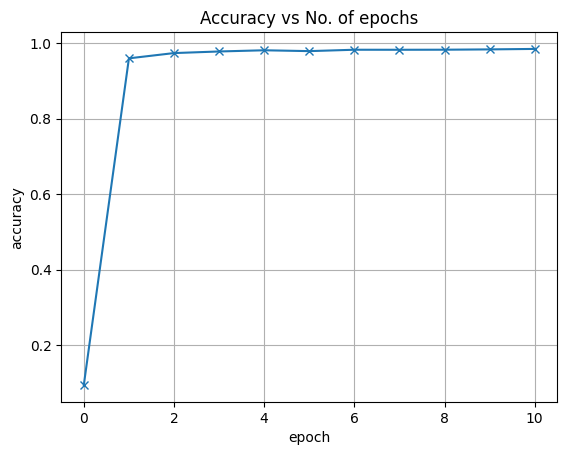

In [152]:
plot_metric([val_acc]+val_metrics)

In [153]:
def plot_losses(train_losses , valid_losses):
  plt.plot(train_losses,'-x')
  plt.plot(valid_losses,'-o')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Training','Validation'])
  plt.title('Loss vs No. of epochs')

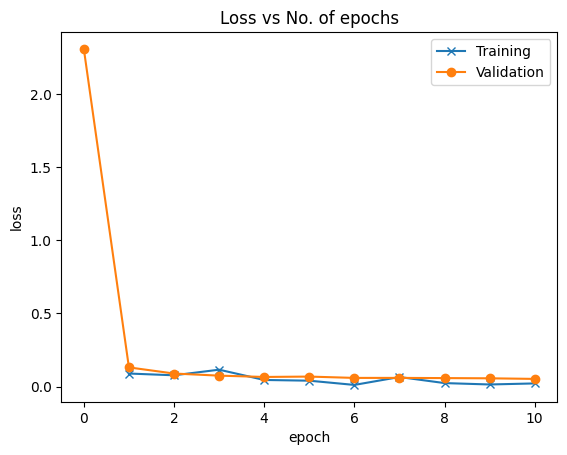

In [154]:
plot_losses([None]+train_losses , [val_loss]+val_losses)

In [155]:
def predict_image(img , model):
  xb = img.unsqueeze(0)
  yb = model(xb.to(device))
  _,preds = torch.max(yb,dim=1)
  return dataset.classes[preds[0].item()]

Label:  7 - seven Predicted: 7 - seven


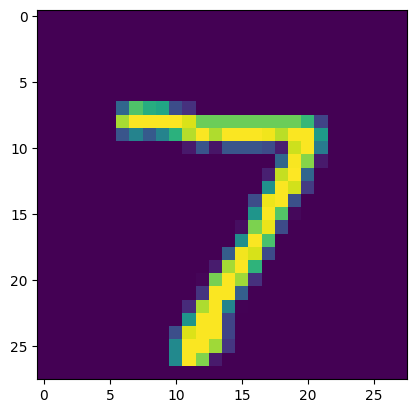

In [156]:
img , label = test_dataset[0]
plt.imshow(img.permute(1,2,0))
print('Label: ',dataset.classes[label],'Predicted:',predict_image(img,model))

Label:  0 - zero Predicted: 0 - zero


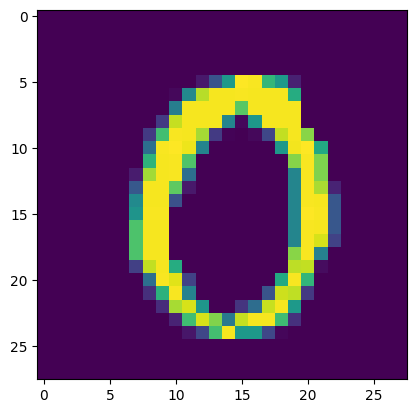

In [157]:
img , label = test_dataset[13]
plt.imshow(img.permute(1,2,0))
print('Label: ',dataset.classes[label],'Predicted:',predict_image(img,model))

In [158]:
test_loader = DataLoader(test_dataset , batch_size)

test_losses , _ , test_acc = evaluate(model,F.cross_entropy,test_loader,metric=accuracy)
print('Loss: {:.4f} , Accuracy: {:.4f}'.format(test_losses,test_acc))

Loss: 0.0395 , Accuracy: 0.9862


In [159]:
torch.save(model.state_dict() , 'MNISTimages')

In [160]:
model2 = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1), # → (16, 28, 28)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),                                   # → (16, 14, 14)

    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),# → (32, 14, 14)
    nn.ReLU(),
    nn.MaxPool2d(2, 2),                                   # → (32, 7, 7)

    nn.Flatten(),
    nn.Linear(16 * 7 * 7, 10),
)

In [161]:
model2.load_state_dict(torch.load('MNISTimages'))

<All keys matched successfully>

In [162]:
test_losses , _ , test_acc = evaluate(to_device(model2 , device),F.cross_entropy,test_loader,metric=accuracy)
print('Loss: {:.4f} , Accuracy: {:.4f}'.format(test_losses,test_acc))

Loss: 0.0395 , Accuracy: 0.9862


# **IMAGE CLASSIFICATION USING RESNETS , DATA AUGMENTATION AND REGULARIZATION**

In [162]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url

In [165]:
class SimpleResidualNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels = 1 , out_channels = 1 , kernel_size = 3 , stride = 1 , padding = 1)
    self.relu1 = nn.ReLU()
    self.conv2 = nn.Conv2d(in_channels = 1 , out_channels = 1 , kernel_size = 3 , stride = 1 , padding = 1)
    self.relu2 = nn.ReLU()

  def forward(self , x):
    out = self.conv1(x)
    out = self.relu1(out)
    out = self.conv2(out)
    return self.relu2(out+x)


In [166]:
simple_resnet = SimpleResidualNetwork()

for images , labels in train_dl:
  out = simple_resnet(images)
  print(out.shape)
  break

torch.Size([100, 1, 28, 28])


In [167]:
def conv2d(ni , nf , stride=1 , ks=3):
  return nn.Conv2d(in_channels = ni , out_channels = nf ,
                   kernel_size = ks, stride = stride ,
                   padding = ks//2 , bias = False)

def bn_relu_conv(ni , nf):
  return nn.Sequential(nn.BatchNorm2d(ni),
                       nn.ReLU(inplace=True),
                       conv2d(ni,nf))

In [206]:
class ResidualBlock(nn.Module):
  def __init__(self , ni , nf , stride=1):
    super().__init__()
    self.bn = nn.BatchNorm2d(ni)
    self.conv1 = conv2d(ni, nf , stride=1)
    self.conv2 = bn_relu_conv(nf, nf)
    self.shortcut = lambda x: x
    if ni!=nf or stride!=1:
      self.shortcut = conv2d(ni , nf , stride=stride , ks=1)

  def forward(self , x):
    r = self.shortcut(x)
    x = self.conv1(x)
    x = self.conv2(x) * 0.2

    if x.shape != r.shape:
        # Dynamically resize shortcut if shapes differ
        r = F.interpolate(r, size=x.shape[2:], mode="nearest")
    return x + r

In [207]:
def make_group(N , ni , nf , stride):
  start = ResidualBlock(ni,nf,stride)
  rest = [ResidualBlock(nf,nf) for j in range(1,N)]
  return [start] +rest

class Flatten(nn.Module):
  def __init__(self):
    super().__init__()
  def forward(self,x):
    return x.view(x.size(0) , -1)

class WideResNet(nn.Module):
  def __init__(self,n_groups, N,n_classes,k=1,n_start=16):
    super().__init__()
    layers = [conv2d(1,n_start)]
    n_channels = [n_start]

    for i in range(n_groups):
      n_channels.append(n_start*(2**i)*k)
      stride = 2 if i>0 else 1
      layers += make_group(N,n_channels[i],n_channels[i+1],stride)

    layers += [nn.BatchNorm2d(n_channels[-1]),
               nn.ReLU(inplace=True),
               nn.AdaptiveAvgPool2d(1),
               Flatten(),
               nn.Linear(n_channels[-1],n_classes)]

    self.features = nn.Sequential(*layers)

  def forward(self,x):
    return self.features(x)

def wrn_22():
  return WideResNet(n_groups=3,N=3,n_classes=10,k=6)

In [208]:
model = wrn_22()

In [209]:
model

WideResNet(
  (features): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ResidualBlock(
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(16, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (conv2): Sequential(
        (0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): ReLU(inplace=True)
        (2): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (shortcut): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (2): ResidualBlock(
      (bn): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (conv2): Sequential(
        (0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

In [210]:
for images , labels in train_dl:
  print(images.shape)
  out=model(images)
  print(out.shape)
  break

torch.Size([100, 1, 28, 28])
torch.Size([100, 10])


# **TRAINING GENERATIVE ADVERSIAL NETWORKS (GANs)**

In [1]:
import torch
import torchvision
from torchvision.transforms import ToTensor , Normalize , Compose
from torchvision.datasets import MNIST

In [4]:
mnist = MNIST(root = 'data',train=True,
              download=True,
              transform = Compose((ToTensor(),Normalize(mean=(0.5,),std=(0.5,)))))

100%|██████████| 9.91M/9.91M [00:00<00:00, 51.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.75MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 15.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.57MB/s]


In [5]:
image , label = mnist[0]
print(label)
print(image[:,10:15,10:15])
torch.min(image) , torch.max(image)

5
tensor([[[-0.9922,  0.2078,  0.9843, -0.2941, -1.0000],
         [-1.0000,  0.0902,  0.9843,  0.4902, -0.9843],
         [-1.0000, -0.9137,  0.4902,  0.9843, -0.4510],
         [-1.0000, -1.0000, -0.7255,  0.8902,  0.7647],
         [-1.0000, -1.0000, -1.0000, -0.3647,  0.8824]]])


(tensor(-1.), tensor(1.))

In [6]:
def denorm(x):
  out = (x+1)/2
  return out.clamp(0,1)

Label: 5


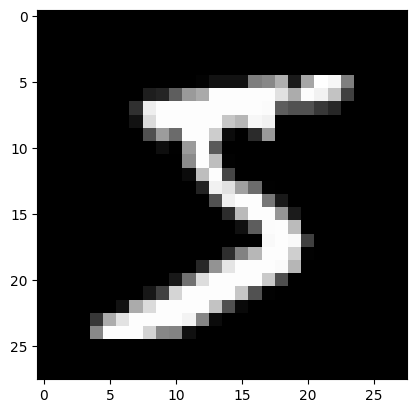

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

img_norm = denorm(image)
plt.imshow(img_norm[0],cmap='gray')
print('Label:' , label)

In [10]:
from torch.utils.data import DataLoader

batch_size = 100
data_loader = DataLoader(mnist , batch_size, shuffle=True)

first batch:
torch.Size([100, 1, 28, 28])
tensor([9, 0, 6, 4, 1, 9, 6, 4, 4, 4, 3, 9, 3, 9, 9, 1, 3, 0, 2, 5, 3, 4, 7, 5,
        8, 0, 2, 1, 6, 8, 6, 5, 1, 0, 1, 0, 5, 6, 8, 5, 3, 1, 6, 4, 4, 4, 7, 1,
        8, 6, 1, 2, 8, 7, 9, 1, 9, 8, 1, 0, 6, 4, 7, 1, 4, 8, 4, 2, 9, 4, 2, 8,
        3, 5, 1, 0, 7, 4, 5, 9, 3, 7, 5, 6, 2, 2, 1, 5, 4, 1, 0, 7, 3, 7, 0, 3,
        0, 8, 8, 3])


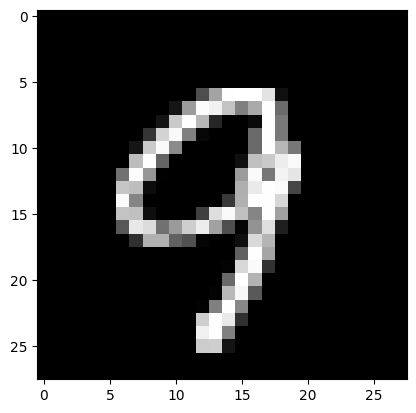

In [12]:
for img_batch , label_batch in data_loader:
  print('first batch:')
  print(img_batch.shape)
  plt.imshow(img_batch[0][0],cmap='gray')
  print(label_batch)
  break

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

# *DISCRIMINATOR NETWORK*

In [14]:
image_size = 784
hidden_size = 256

In [16]:
import torch.nn as nn

D = nn.Sequential(
    nn.Linear(image_size,hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size,hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size,1),
    nn.Sigmoid()
)

In [17]:
D.to(device);

# *GENERATOR NETWORK*

In [18]:
latent_size = 64

G = nn.Sequential(
    nn.Linear(latent_size,hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size,hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size,image_size),
    nn.Tanh()
)

In [19]:
y = G(torch.randn(2,latent_size))
gen_image = denorm(y.reshape(-1,28,28)).detach()

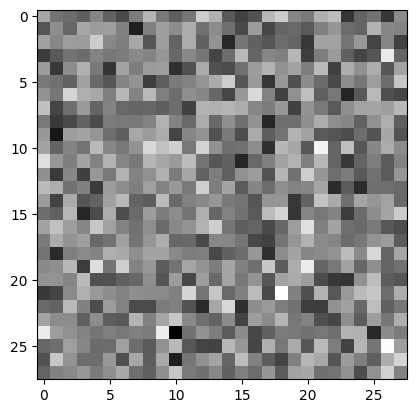

In [20]:
plt.imshow(gen_image[0],cmap='gray')

In [22]:
G.to(device);

In [26]:
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(),lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(),lr=0.0002)

In [27]:
def reset_grad():
  d_optimizer.zero_grad()
  g_optimizer.zero_grad()

def train_discriminator(images):
  real_labels = torch.ones(batch_size,1).to(device)
  fake_labels = torch.zeros(batch_size,1).to(device)

  outputs = D(images)
  d_loss_real = criterion(outputs,real_labels)
  real_score = outputs

  z = torch.randn(batch_size,latent_size).to(device)
  fake_images = G(z)
  outputs = D(fake_images)
  d_loss_fake = criterion(outputs,fake_labels)
  fake_score = outputs

  d_loss = d_loss_real + d_loss_fake

  reset_grad()

  d_loss.backward()

  d_optimizer.step()

  return d_loss , real_score , fake_score

# **GENERATOR TRAINING**

In [28]:
z = torch.randn(batch_size,latent_size).to(device)
fake_images = G(z)
D(fake_images)

tensor([[0.5024],
        [0.5024],
        [0.5026],
        [0.5011],
        [0.5016],
        [0.5011],
        [0.5017],
        [0.5030],
        [0.4989],
        [0.5009],
        [0.5031],
        [0.5029],
        [0.5027],
        [0.5009],
        [0.5037],
        [0.4997],
        [0.4988],
        [0.5001],
        [0.5026],
        [0.5036],
        [0.4997],
        [0.5026],
        [0.5006],
        [0.5005],
        [0.5001],
        [0.5003],
        [0.5015],
        [0.5040],
        [0.5015],
        [0.4997],
        [0.4998],
        [0.4988],
        [0.4989],
        [0.5020],
        [0.5010],
        [0.5030],
        [0.5024],
        [0.5017],
        [0.4987],
        [0.4997],
        [0.4993],
        [0.5010],
        [0.5036],
        [0.5010],
        [0.5010],
        [0.5005],
        [0.5026],
        [0.4993],
        [0.4986],
        [0.5031],
        [0.5028],
        [0.5004],
        [0.5015],
        [0.5014],
        [0.5008],
        [0

In [29]:
def train_generator():
  z = torch.randn(batch_size,latent_size).to(device)
  fake_images = G(z)
  labels = torch.ones(batch_size,1).to(device)
  g_loss = criterion(D(fake_images),labels)

  reset_grad()
  g_loss.backward()
  g_optimizer.step()
  return g_loss , fake_images

# **TRAINING THE MODEL**

In [30]:
import os

sample_dir = 'samples'
if not os.path.exists(sample_dir):
  os.makedirs(sample_dir)

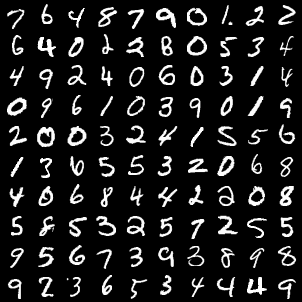

In [31]:
from IPython.display import Image
from torchvision.utils import save_image

for images , _ in data_loader:
  images = images.reshape(images.size(0) , 1 , 28 , 28)
  save_image(denorm(images) , os.path.join(sample_dir , 'real_images.png') , nrow=10)
  break

Image(os.path.join(sample_dir,'real_images.png'))

In [35]:
sample_vectors = torch.randn(batch_size,latent_size).to(device)

def save_fake_images(index):
  fake_images = G(sample_vectors)
  fake_images = fake_images.reshape(fake_images.size(0),1,28,28)
  fake_fname = 'fake_images-{0:0=4d}.png'.format(index)
  print('Saving',fake_fname)
  save_image(denorm(fake_images),os.path.join(sample_dir,fake_fname),nrow=10)

save_fake_images(0)
Image(os.path.join(sample_dir),'fake_images_0000.png')

Saving fake_images-0000.png


In [37]:
%%time

num_epochs = 50
total_step = len(data_loader)
d_losses , g_losses , real_scores , fake_scores = [], [], [], []

for epoch in range(num_epochs):
  for i , (images, _) in enumerate(data_loader):
    images = images.reshape(batch_size,-1).to(device)

    d_loss , real_score , fake_score = train_discriminator(images)
    g_loss , fake_images = train_generator()

    if (i+1)%200 == 0:
      d_losses.append(d_loss.item())
      g_losses.append(g_loss.item())
      real_scores.append(real_score.mean().item())
      fake_scores.append(fake_score.mean().item())
      print('Epoch [{}/{}] , Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f} , D(x): {:.2f}'
              .format(epoch , num_epochs , i+1 , total_step , d_loss.item(),g_loss.item(),
              real_score.mean().item(),fake_score.mean().item()))

  save_fake_images(epoch+1)

Epoch [0/50] , Step [200/600], d_loss: 0.1091, g_loss: 5.5514 , D(x): 0.97
Epoch [0/50] , Step [400/600], d_loss: 0.0229, g_loss: 5.2251 , D(x): 0.99
Epoch [0/50] , Step [600/600], d_loss: 0.0630, g_loss: 4.9405 , D(x): 0.98
Saving fake_images-0001.png
Epoch [1/50] , Step [200/600], d_loss: 0.2686, g_loss: 4.6795 , D(x): 0.87
Epoch [1/50] , Step [400/600], d_loss: 0.1231, g_loss: 4.6946 , D(x): 0.95
Epoch [1/50] , Step [600/600], d_loss: 0.1357, g_loss: 4.1166 , D(x): 0.96
Saving fake_images-0002.png
Epoch [2/50] , Step [200/600], d_loss: 0.3725, g_loss: 2.9069 , D(x): 0.89
Epoch [2/50] , Step [400/600], d_loss: 0.4325, g_loss: 4.1749 , D(x): 0.86
Epoch [2/50] , Step [600/600], d_loss: 0.8253, g_loss: 3.9299 , D(x): 0.76
Saving fake_images-0003.png
Epoch [3/50] , Step [200/600], d_loss: 0.1307, g_loss: 4.0595 , D(x): 0.97
Epoch [3/50] , Step [400/600], d_loss: 0.8027, g_loss: 1.8584 , D(x): 0.79
Epoch [3/50] , Step [600/600], d_loss: 0.2155, g_loss: 4.5577 , D(x): 0.93
Saving fake_imag

In [38]:
torch.save(G.state_dict(),'G.ckpt')
torch.save(D.state_dict(),'D.ckpt')

In [39]:
import cv2
import os
from IPython.display import FileLink

files = [os.path.join(sample_dir,f) for f in os.listdir(sample_dir) if 'fake_images' in f]
files.sort()
files

['samples/fake_images-0000.png',
 'samples/fake_images-0001.png',
 'samples/fake_images-0002.png',
 'samples/fake_images-0003.png',
 'samples/fake_images-0004.png',
 'samples/fake_images-0005.png',
 'samples/fake_images-0006.png',
 'samples/fake_images-0007.png',
 'samples/fake_images-0008.png',
 'samples/fake_images-0009.png',
 'samples/fake_images-0010.png',
 'samples/fake_images-0011.png',
 'samples/fake_images-0012.png',
 'samples/fake_images-0013.png',
 'samples/fake_images-0014.png',
 'samples/fake_images-0015.png',
 'samples/fake_images-0016.png',
 'samples/fake_images-0017.png',
 'samples/fake_images-0018.png',
 'samples/fake_images-0019.png',
 'samples/fake_images-0020.png',
 'samples/fake_images-0021.png',
 'samples/fake_images-0022.png',
 'samples/fake_images-0023.png',
 'samples/fake_images-0024.png',
 'samples/fake_images-0025.png',
 'samples/fake_images-0026.png',
 'samples/fake_images-0027.png',
 'samples/fake_images-0028.png',
 'samples/fake_images-0029.png',
 'samples/

In [43]:
vid_fname = 'gans_training.avi'
out = cv2.VideoWriter(vid_fname , cv2.VideoWriter_fourcc(*'MP4V') , 8 , (302,302))
[out.write(cv2.imread(fname)) for fname in files]
out.release()
FileLink('gans_training.avi')

/content/gans_training.avi

# **VISUALIZING LOSSES AND SCORES**

Text(0.5, 1.0, 'Losses')

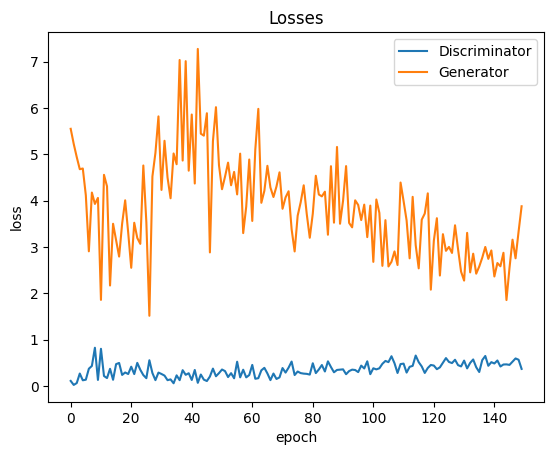

In [46]:
plt.plot(d_losses ,'-')
plt.plot(g_losses,'-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator','Generator'])
plt.title('Losses')

Text(0.5, 1.0, 'Scores')

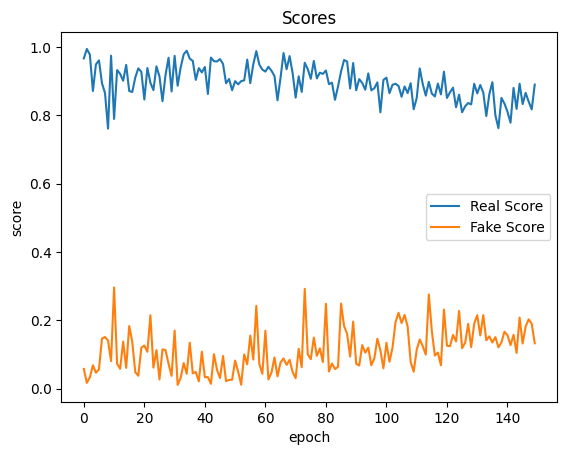

In [47]:
plt.plot(real_scores,'-')
plt.plot(fake_scores,'-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real Score' , 'Fake Score'])
plt.title('Scores')